## Bagging Decision Tree Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/zunhnin/alzheimers_disease/refs/heads/main/alzheimers_disease_data.csv")

In [3]:
data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [4]:
features = ["MMSE", "MemoryComplaints", "ADL", "BehavioralProblems", "FunctionalAssessment"]
target = "Diagnosis"

In [5]:
x = data[features]
y = data [target]

In [6]:
print(x.head())
print(y.head())

        MMSE  MemoryComplaints       ADL  BehavioralProblems  \
0  21.463532                 0  1.725883                   0   
1  20.613267                 0  2.592424                   0   
2   7.356249                 0  7.119548                   0   
3  13.991127                 0  6.481226                   1   
4  13.517609                 0  0.014691                   0   

   FunctionalAssessment  
0              6.518877  
1              7.118696  
2              5.895077  
3              8.965106  
4              6.045039  
0    0
1    0
2    0
3    0
4    0
Name: Diagnosis, dtype: int64


### How to Build Model
- For each n, create n bootstrap samples
- Train n decision trees
- Combine their predictions using majority voting
- Evaluate on the test set

### Benefits of Using Bagging with Decision Trees:
- Reduced overfitting
- improved accuracy
- More Robust
- good for imblanced data

In our dataset, trying to predict whether someone has Alzheimer’s or not.
Most of the people in the dataset are healthy, and only a smaller group actually have Alzheimer’s.
Because of that, we call the Alzheimer’s group the minority class — it’s the class with fewer examples.
The healthy group is called the majority class since it has more data points.
This imbalance can be a problem for machine learning models, because they tend to focus more on the majority class and may ignore or misclassify the minority class.
But in this case, the minority class — people with Alzheimer’s — is actually the most important group to detect.
That’s why special techniques, like bagging and class weighting, to help the model better learn from this smaller group and not overlook it.


1 trees → Test Accuracy: 0.9116
Best number of trees: 1 with accuracy 0.9116


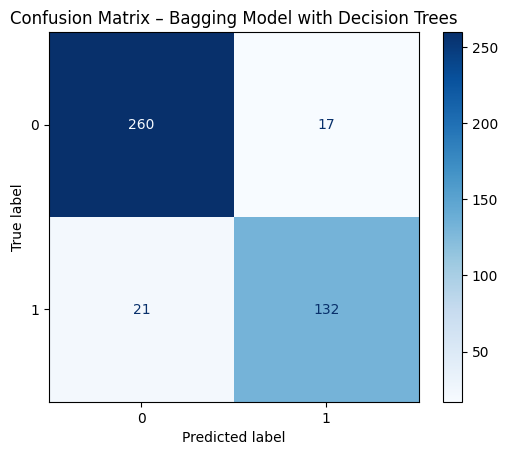

<Figure size 640x480 with 0 Axes>

2 trees → Test Accuracy: 0.8930
Best number of trees: 1 with accuracy 0.9116


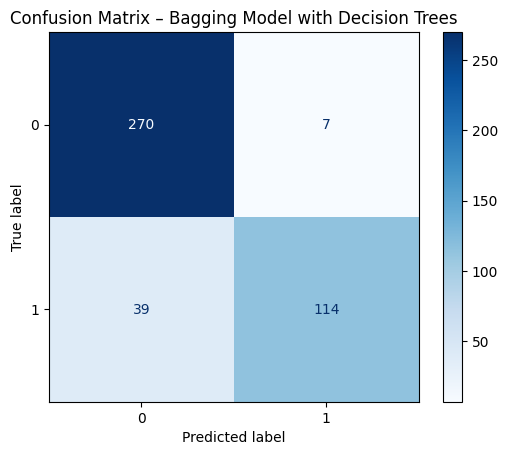

<Figure size 640x480 with 0 Axes>

3 trees → Test Accuracy: 0.9349
Best number of trees: 3 with accuracy 0.9349


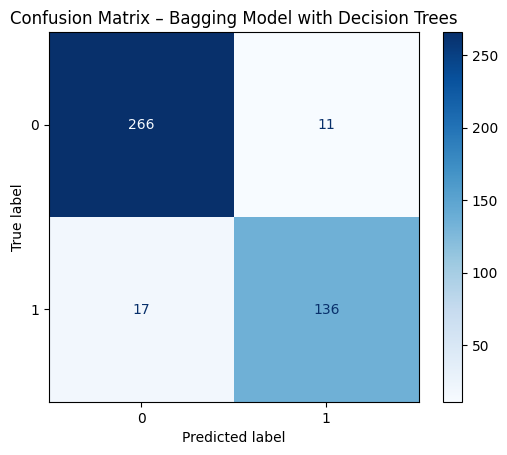

<Figure size 640x480 with 0 Axes>

4 trees → Test Accuracy: 0.9326
Best number of trees: 3 with accuracy 0.9349


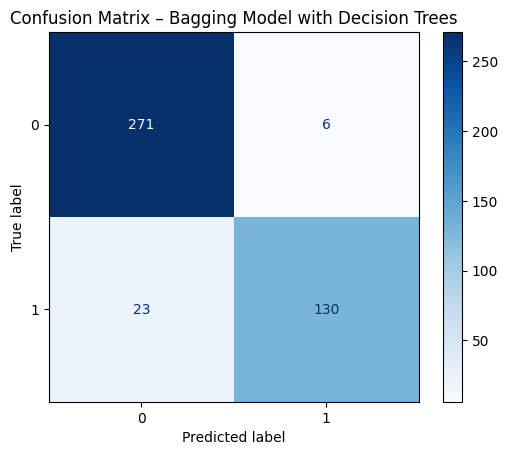

<Figure size 640x480 with 0 Axes>

5 trees → Test Accuracy: 0.9302
Best number of trees: 3 with accuracy 0.9349


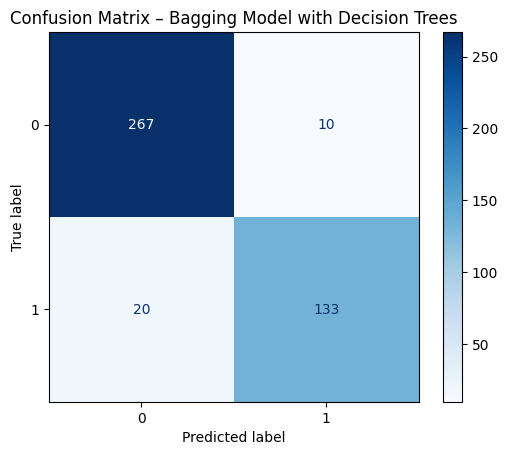

<Figure size 640x480 with 0 Axes>

6 trees → Test Accuracy: 0.9372
Best number of trees: 6 with accuracy 0.9372


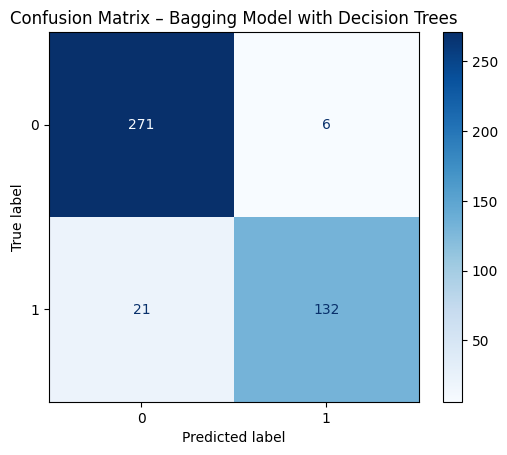

<Figure size 640x480 with 0 Axes>

7 trees → Test Accuracy: 0.9535
Best number of trees: 7 with accuracy 0.9535


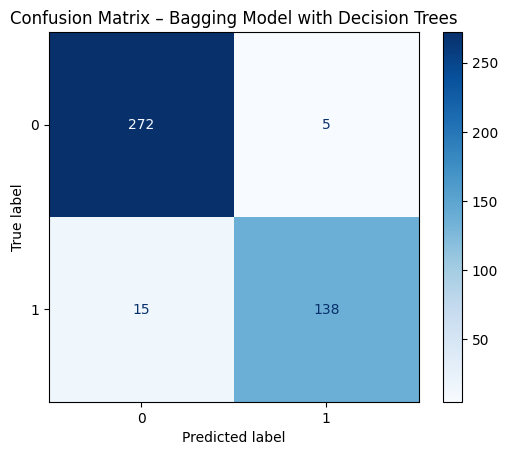

<Figure size 640x480 with 0 Axes>

8 trees → Test Accuracy: 0.9279
Best number of trees: 7 with accuracy 0.9535


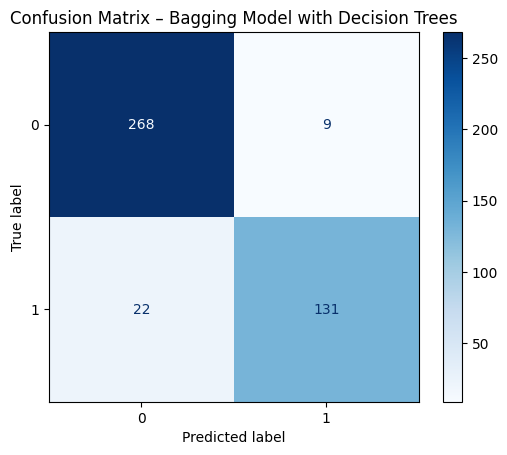

<Figure size 640x480 with 0 Axes>

9 trees → Test Accuracy: 0.9512
Best number of trees: 7 with accuracy 0.9535


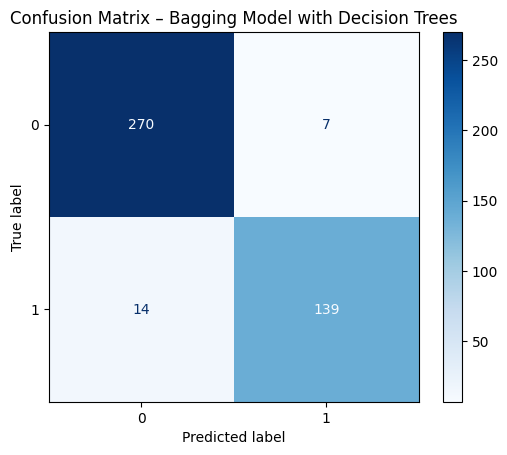

<Figure size 640x480 with 0 Axes>

10 trees → Test Accuracy: 0.9488
Best number of trees: 7 with accuracy 0.9535


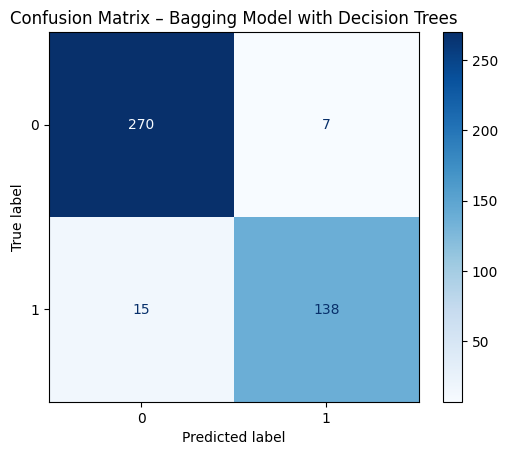

<Figure size 640x480 with 0 Axes>

11 trees → Test Accuracy: 0.9372
Best number of trees: 7 with accuracy 0.9535


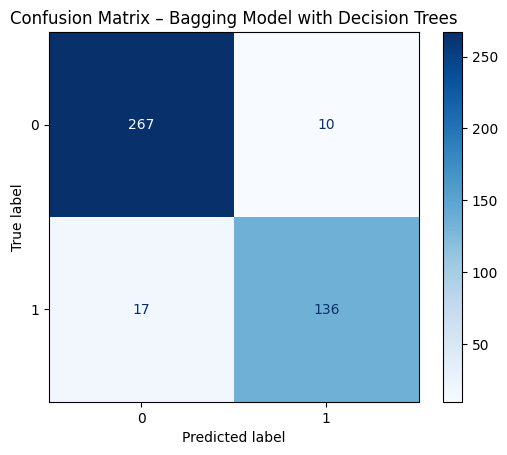

<Figure size 640x480 with 0 Axes>

12 trees → Test Accuracy: 0.9442
Best number of trees: 7 with accuracy 0.9535


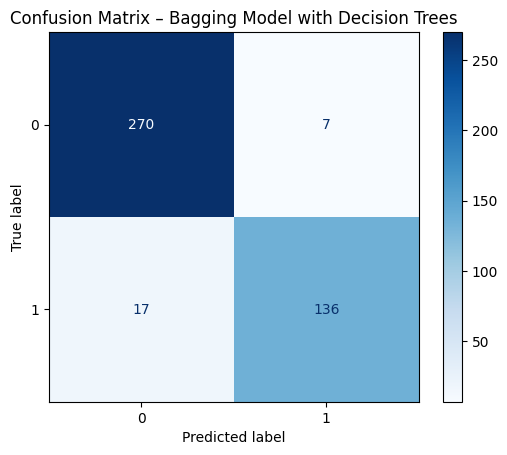

<Figure size 640x480 with 0 Axes>

13 trees → Test Accuracy: 0.9442
Best number of trees: 7 with accuracy 0.9535


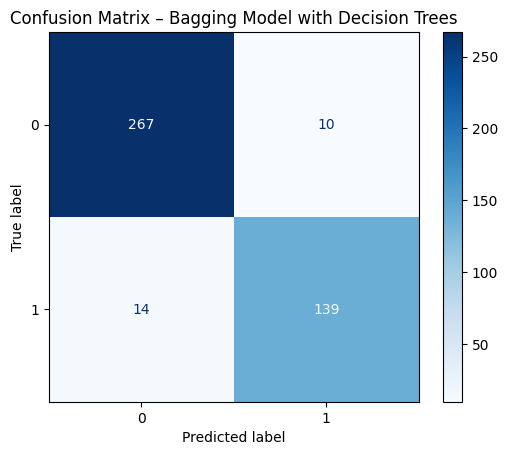

<Figure size 640x480 with 0 Axes>

14 trees → Test Accuracy: 0.9465
Best number of trees: 7 with accuracy 0.9535


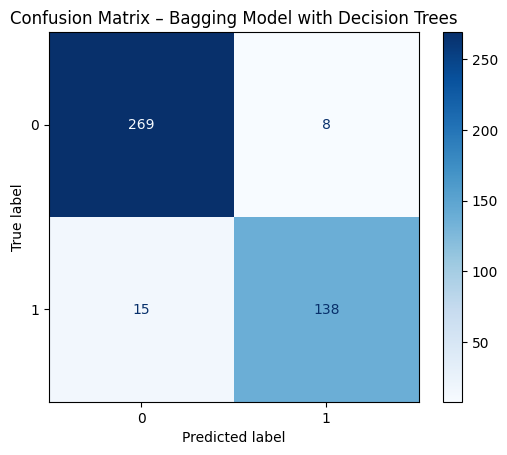

<Figure size 640x480 with 0 Axes>

15 trees → Test Accuracy: 0.9512
Best number of trees: 7 with accuracy 0.9535


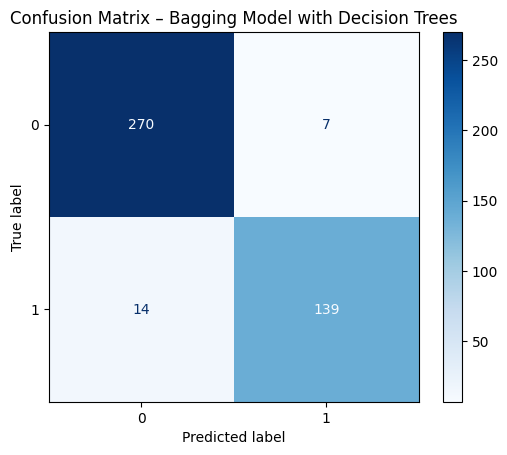

<Figure size 640x480 with 0 Axes>

16 trees → Test Accuracy: 0.9512
Best number of trees: 7 with accuracy 0.9535


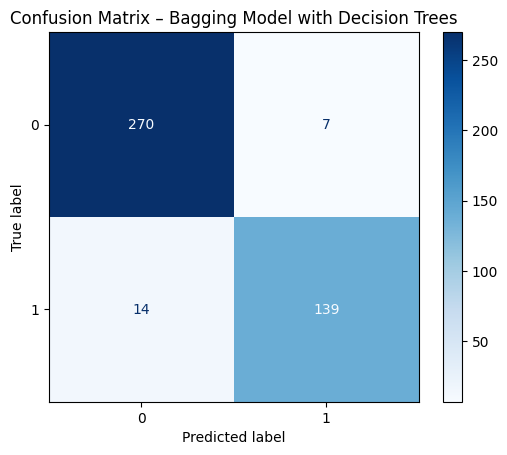

<Figure size 640x480 with 0 Axes>

17 trees → Test Accuracy: 0.9512
Best number of trees: 7 with accuracy 0.9535


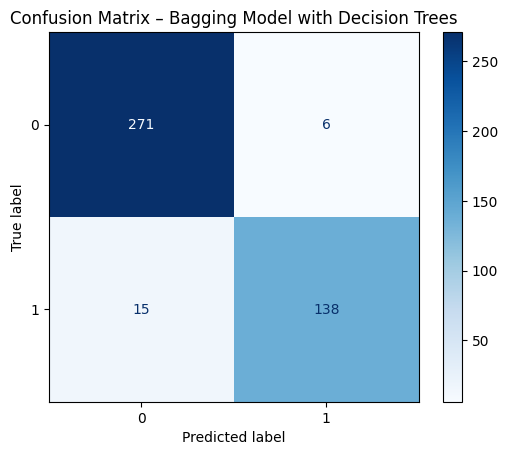

<Figure size 640x480 with 0 Axes>

18 trees → Test Accuracy: 0.9465
Best number of trees: 7 with accuracy 0.9535


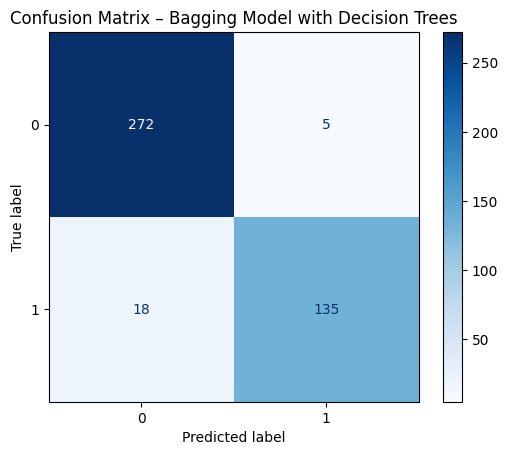

<Figure size 640x480 with 0 Axes>

19 trees → Test Accuracy: 0.9512
Best number of trees: 7 with accuracy 0.9535


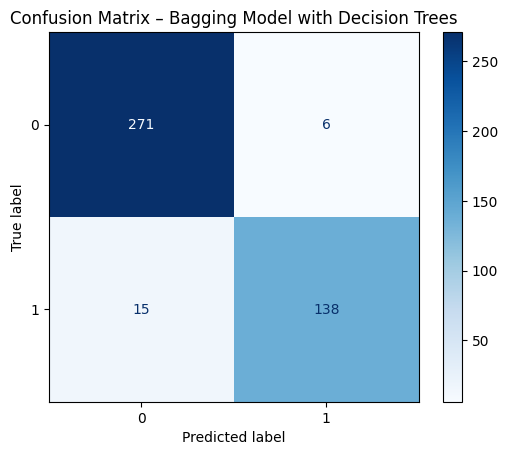

<Figure size 640x480 with 0 Axes>

20 trees → Test Accuracy: 0.9465
Best number of trees: 7 with accuracy 0.9535


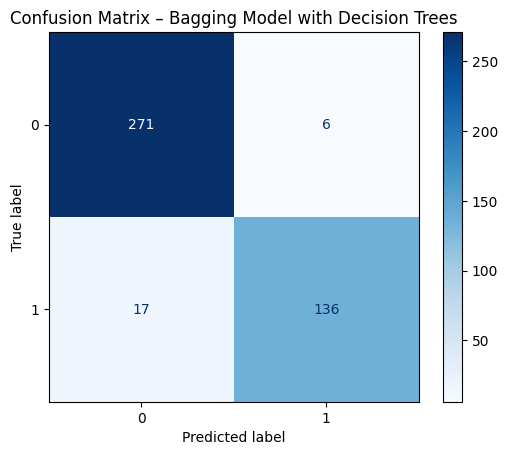

<Figure size 640x480 with 0 Axes>

21 trees → Test Accuracy: 0.9512
Best number of trees: 7 with accuracy 0.9535


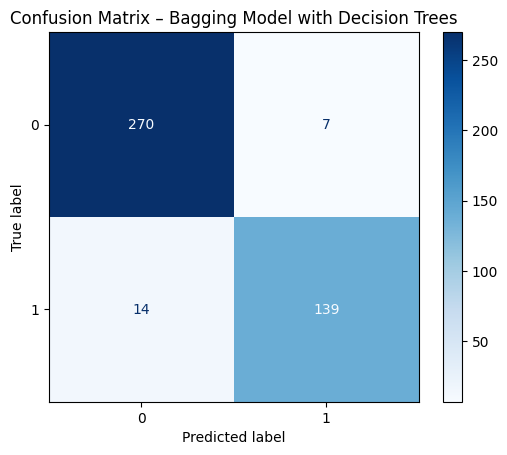

<Figure size 640x480 with 0 Axes>

22 trees → Test Accuracy: 0.9442
Best number of trees: 7 with accuracy 0.9535


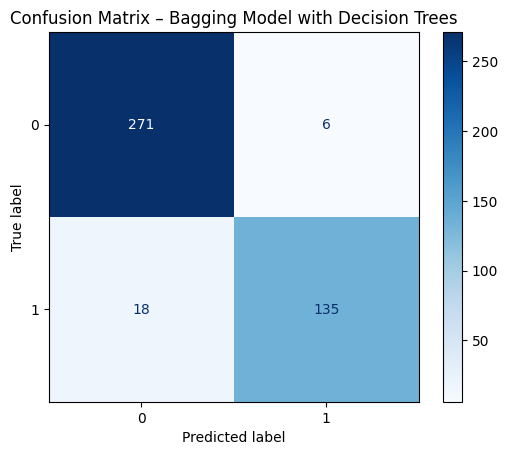

<Figure size 640x480 with 0 Axes>

23 trees → Test Accuracy: 0.9558
Best number of trees: 23 with accuracy 0.9558


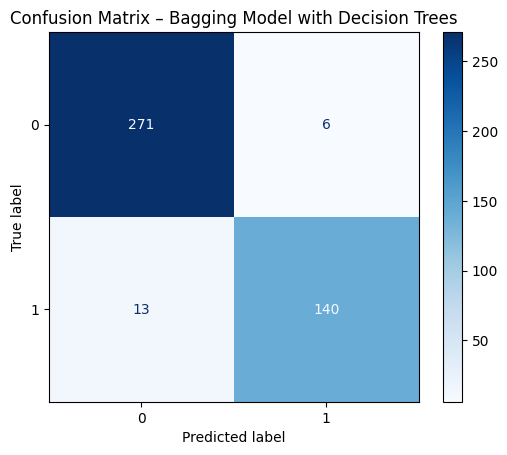

<Figure size 640x480 with 0 Axes>

24 trees → Test Accuracy: 0.9465
Best number of trees: 23 with accuracy 0.9558


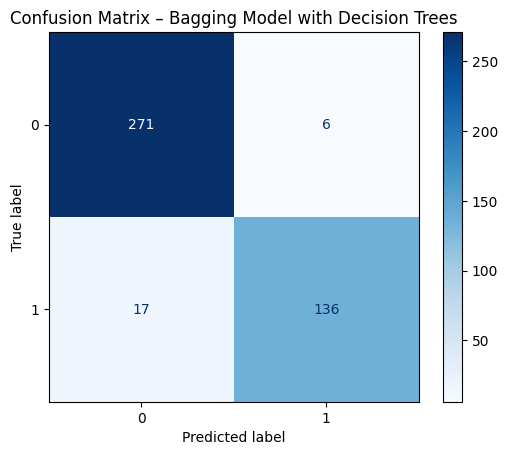

<Figure size 640x480 with 0 Axes>

25 trees → Test Accuracy: 0.9488
Best number of trees: 23 with accuracy 0.9558


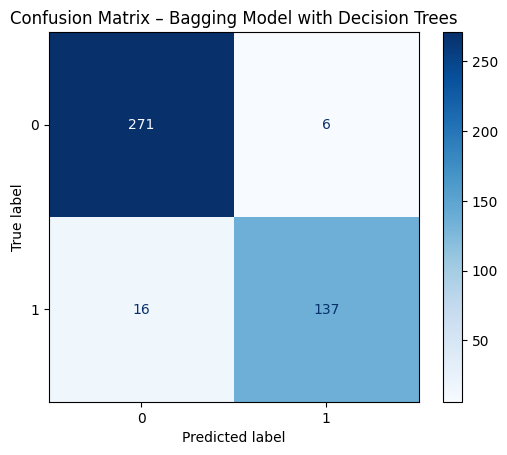

<Figure size 640x480 with 0 Axes>

26 trees → Test Accuracy: 0.9558
Best number of trees: 23 with accuracy 0.9558


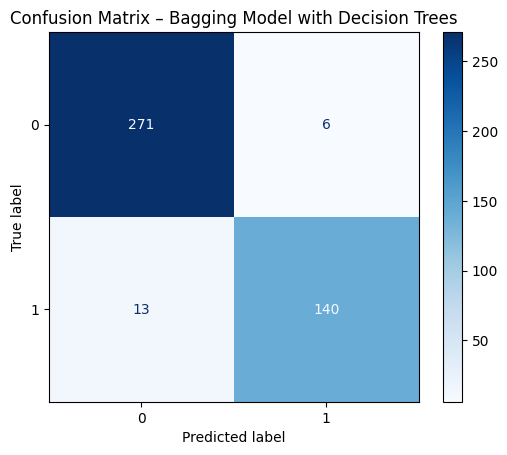

<Figure size 640x480 with 0 Axes>

27 trees → Test Accuracy: 0.9558
Best number of trees: 23 with accuracy 0.9558


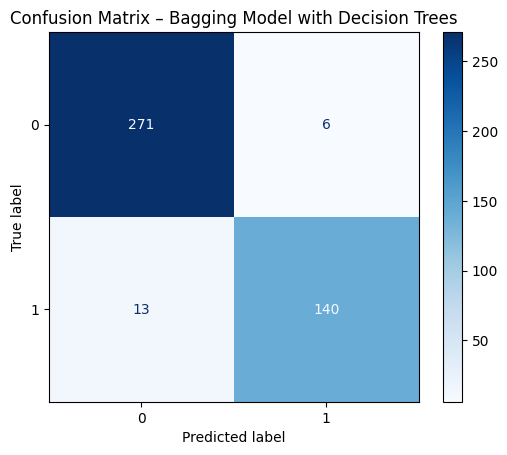

<Figure size 640x480 with 0 Axes>

28 trees → Test Accuracy: 0.9535
Best number of trees: 23 with accuracy 0.9558


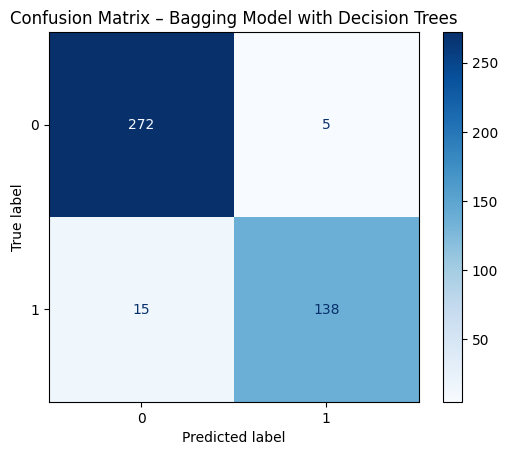

<Figure size 640x480 with 0 Axes>

29 trees → Test Accuracy: 0.9488
Best number of trees: 23 with accuracy 0.9558


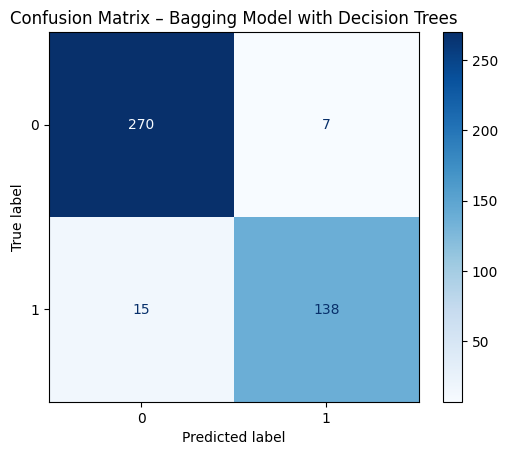

<Figure size 640x480 with 0 Axes>

30 trees → Test Accuracy: 0.9512
Best number of trees: 23 with accuracy 0.9558


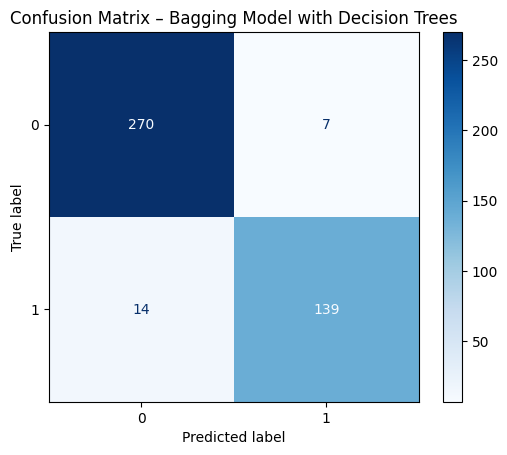

<Figure size 640x480 with 0 Axes>

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       277
           1       0.95      0.91      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430



In [7]:
# Split into 80% training and 20% testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Bagging with tree
results = {}

for n in [1,2,3,4,5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]:
    models = []
    all_preds = []

    for i in range(n):
        #Create a bootstrap sample from 80% training data
        indices = np.random.choice(len(x_train), size=len(x_train), replace=True)
        x_sample = x_train.iloc[indices]
        y_sample = y_train.iloc[indices]

        # Train model on the bootstrap sample
        model = DecisionTreeClassifier(random_state=42)
        model.fit(x_sample, y_sample)
        models.append(model)

        # Weighted model
        #model_weighted = DecisionTreeClassifier(max_depth=15,class_weight= 'balanced',random_state=42)
        model_weighted = DecisionTreeClassifier(max_depth=15, min_samples_split=10,min_samples_leaf=10,class_weight= 'balanced',random_state=42)
        model_weighted.fit(x_train, y_train)
        preds_weighted = model_weighted.predict(x_test)

        # Predict on 20% test data
        preds = model.predict(x_test)
        all_preds.append(preds)

    # Majority vote across all trees
    all_preds = np.array(all_preds).T
    final_preds = mode(all_preds, axis=1).mode.ravel()
    # Evaluate on test set
    acc = accuracy_score(y_test, final_preds)
    results[n] = acc
    print(f"{n} trees → Test Accuracy: {acc:.4f}")
    best_n = max(results, key=results.get)
    print(f"Best number of trees: {best_n} with accuracy {results[best_n]:.4f}")
    
    from sklearn.metrics import ConfusionMatrixDisplay

    ConfusionMatrixDisplay.from_predictions(y_test, final_preds, cmap='Blues')
    plt.title("Confusion Matrix – Bagging Model with Decision Trees")
    plt.show()
    plt.tight_layout()
    plt.show()
    
print(classification_report(y_test, final_preds))

In [8]:
 best_n = max(results, key=results.get)
 print(f"Best number of trees: {best_n} with accuracy {results[best_n]:.4f}")

Best number of trees: 23 with accuracy 0.9558


In [9]:
print(classification_report(y_test, final_preds))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       277
           1       0.95      0.91      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430



TN (True Negative) = 271
FP (False Positive) = 6
FN (False Negative) = 14
TP (True Positive) = 139

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, final_preds)
print(cm)
TN, FP, FN, TP = cm.ravel()

accuracy  = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall    = TP / (TP + FN)
f1_score  = 2 * (precision * recall) / (precision + recall)
fnr = FN / (FN + TP)

print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1_score:.2f}")
print(f"False Negative Rate: {fnr:.4f}")

[[270   7]
 [ 14 139]]
Accuracy:  0.95
Precision: 0.95
Recall:    0.91
F1 Score:  0.93
False Negative Rate: 0.0915


### Overall Analysis
High Accuracy : The model performs well overall on unseen test data.
Most of the patients predicted to have Alzheimer’s truly do.
Recall: The model correctly detects of all actual Alzheimer’s cases.
Each time I run the model, the false negative rate stays consistently below 10%, showing stable and reliable performance in detecting actual Alzheimer’s cases.
The bagging model with decision trees shows strong and balanced performance, with high recall and precision, making it suitable for early Alzheimer’s screening.